### 1. Load the dataset into python environment

In [1]:
import pandas as pd
import numpy as np

In [2]:
tdat=pd.read_csv('titanic_dataset.csv')
tdat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [3]:
tdat.set_index(['PassengerId'],inplace=True)
tdat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
tdat.shape

(891, 11)

In [5]:
tdat.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
tdat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
tdat.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age boxplot')

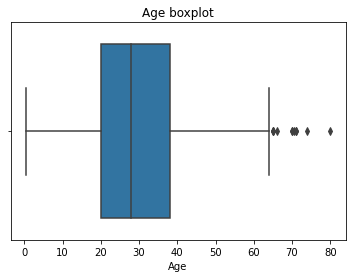

In [8]:
import seaborn as sns
sns.boxplot(tdat['Age']).set_title('Age boxplot')

In [9]:
## Since there are many outliers present in age dataset,we cannot use mean value of age data to fill null values.
## So we take median value for age data and mode value for other categorical datas Cabin and Embarked columns.

In [10]:
meda=tdat['Age'].median()
tdat['Age'].fillna(value=meda,inplace=True)

In [11]:
tdat['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [12]:
tdat['Cabin'].fillna('B96',inplace=True)

In [13]:
tdat['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [14]:
tdat['Embarked'].fillna('S',inplace=True)

In [15]:
tdat.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

In [16]:
Q1=np.percentile(tdat['Age'],25)
Q3=np.percentile(tdat['Age'],75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
print(ll,ul)

2.5 54.5


In [17]:
ageout=tdat.loc[tdat['Age']<ll,'Age']
tdat.loc[tdat.Age<ll,'Age']=np.nan
tdat.fillna(ll,inplace=True)
ageout2=tdat.loc[tdat['Age']>ul,'Age']
tdat.loc[tdat.Age>ul,'Age']=np.nan
tdat.fillna(ul,inplace=True)

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

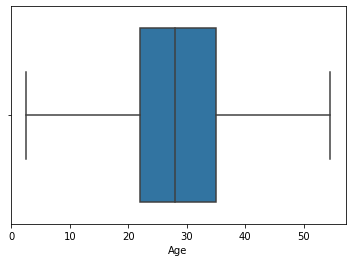

In [18]:
sns.boxplot(tdat['Age'])

In [19]:
## Now there are no outliers in ages data.

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

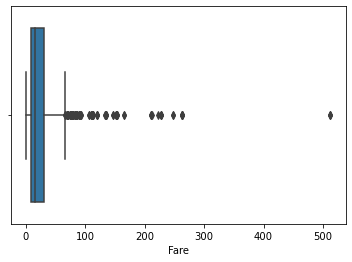

In [20]:
sns.boxplot(tdat['Fare'])

In [21]:
Q11=np.percentile(tdat['Fare'],25)
Q33=np.percentile(tdat['Fare'],75)
IQR1=Q33-Q11
llf=Q11-1.5*IQR
ulf=Q33+1.5*IQR
print(llf,ulf)

-11.5896 50.5


In [22]:
ageout1=tdat.loc[tdat['Fare']<llf,'Fare']
tdat.loc[tdat.Fare<llf,'Fare']=np.nan
tdat.fillna(llf,inplace=True)
ageout3=tdat.loc[tdat['Fare']>ulf,'Fare']
tdat.loc[tdat.Fare>ulf,'Fare']=np.nan
tdat.fillna(ulf,inplace=True)

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

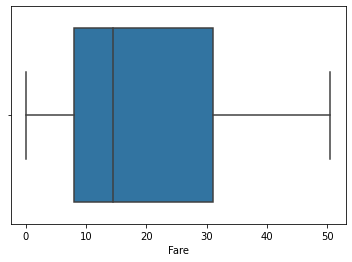

In [23]:
sns.boxplot(tdat['Fare'])

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

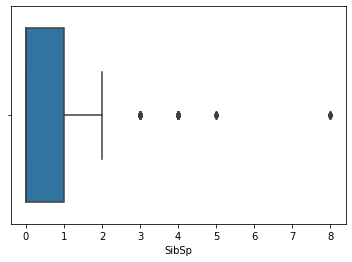

In [24]:
sns.boxplot(tdat['SibSp'])

In [25]:
Q1P=np.percentile(tdat['SibSp'],25)
Q3P=np.percentile(tdat['SibSp'],75)
IQR2=Q3P-Q1P
lls=Q1P-1.5*IQR2
uls=Q3P+1.5*IQR2
print(lls,uls)

-1.5 2.5


In [26]:
ageouts=tdat.loc[tdat['SibSp']<lls,'SibSp']
tdat.loc[tdat.SibSp<lls,'SibSp']=np.nan
tdat.fillna(lls,inplace=True)
ageoutsi=tdat.loc[tdat['SibSp']>uls,'SibSp']
tdat.loc[tdat.SibSp>uls,'SibSp']=np.nan
tdat.fillna(uls,inplace=True)

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

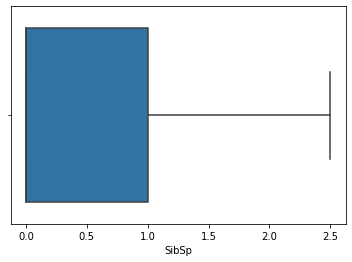

In [27]:
sns.boxplot(tdat['SibSp'])

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [28]:
## in min-max scaling all values are scaled in between the range[0,1].It requires sklearn module

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(tdat[['Survived','Fare']].to_numpy())
df_scaled=pd.DataFrame(df_scaled,columns=['Survived','Fare'])

In [30]:
tdat.loc[:,['Survived','Fare']]=df_scaled[['Survived','Fare']]

In [31]:
tdat.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
268,1.0,3,"Persson, Mr. Ernst Ulrik",male,25.0,1.0,0,347083,1.000000,B96,S
504,1.0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0.0,0,4135,1.000000,B96,S
320,0.0,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1.0,1,16966,0.143564,E34,C
860,0.0,3,"Razi, Mr. Raihed",male,28.0,0.0,0,2629,0.279372,B96,C
494,0.0,1,"Artagaveytia, Mr. Ramon",male,54.5,0.0,0,PC 17609,0.159406,B96,C


In [32]:
## Here we scaled data of both survived and fare columns.